In [4]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import os 

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from collections import Counter

Loading data into the kernals

In [6]:
PCOS_inf = pd.read_csv('PCOS_infertility.csv')
PCOS_woinf = pd.read_csv ('PCOS_data_without_infertility.csv')
PCOS_woinf

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.000,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.500,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.000,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.000,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.000,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.5,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.3,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.4,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.2,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


Data Preprocessing

In [7]:
#Merging the two files as per patient file no.
#The files were sorted into two based on patients with infertility and without infertility
data = pd.merge(PCOS_woinf, PCOS_inf, on='Patient File No.', suffixes=('', '_y'), how='left')
print(data.info())

#Dropping the repeated features after merging
data = data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)' ,'II    beta-HCG(mIU/mL)' ,'AMH(ng/mL)_y'], axis=1)

#Taking a Look at the dataset
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sl. No                    541 non-null    int64  
 1   Patient File No.          541 non-null    int64  
 2   PCOS (Y/N)                541 non-null    int64  
 3    Age (yrs)                541 non-null    int64  
 4   Weight (Kg)               541 non-null    float64
 5   Height(Cm)                541 non-null    float64
 6   BMI                       541 non-null    float64
 7   Blood Group               541 non-null    int64  
 8   Pulse rate(bpm)           541 non-null    int64  
 9   RR (breaths/min)          541 non-null    int64  
 10  Hb(g/dl)                  541 non-null    float64
 11  Cycle(R/I)                541 non-null    int64  
 12  Cycle length(days)        541 non-null    int64  
 13  Marraige Status (Yrs)     540 non-null    float64
 14  Pregnant(Y

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),I beta-HCG(mIU/mL)_y,II beta-HCG(mIU/mL)_y
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,110,80,3,3,18.0,18.0,8.5,NaN,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0,120,70,3,5,15.0,14.0,3.7,NaN,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,0,120,80,13,15,18.0,20.0,10.0,NaN,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0,120,70,2,2,15.0,14.0,7.5,NaN,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0,120,80,3,4,16.0,14.0,7.0,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sl. No                    541 non-null    int64  
 1   Patient File No.          541 non-null    int64  
 2   PCOS (Y/N)                541 non-null    int64  
 3    Age (yrs)                541 non-null    int64  
 4   Weight (Kg)               541 non-null    float64
 5   Height(Cm)                541 non-null    float64
 6   BMI                       541 non-null    float64
 7   Blood Group               541 non-null    int64  
 8   Pulse rate(bpm)           541 non-null    int64  
 9   RR (breaths/min)          541 non-null    int64  
 10  Hb(g/dl)                  541 non-null    float64
 11  Cycle(R/I)                541 non-null    int64  
 12  Cycle length(days)        541 non-null    int64  
 13  Marraige Status (Yrs)     540 non-null    float64
 14  Pregnant(Y

Encoding categorical variables

In [11]:
#Dealing with categorical values.
#In this database the type objects are numeric values saved as strings.
# So converting it into a numeric value.

data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)_y"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)_y"], errors='coerce')

#Dealing with missing values.
#FiLLing NA values with the median of that feature.

data['Marraige Status (Yrs)'].fillna (data['Marraige Status (Yrs)'].median(), inplace=True)
data['II    beta-HCG(mIU/mL)_y']. fillna(data['II    beta-HCG(mIU/mL)_y'].median (), inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(), inplace=True)
data['Fast food (Y/N)'].fillna (data['Fast food (Y/N)'].median(), inplace=True)

#Clearing up the extra space in the column names
data.columns= [col.strip() for col in data.columns]

C:\Users\Keerthi\AppData\Local\Temp\ipykernel_9316\1312808829.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Marraige Status (Yrs)'].fillna (data['Marraige Status (Yrs)'].median(), inplace=True)
C:\Users\Keerthi\AppData\Roaming\Python\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Keerthi\AppData\Local\Temp\ipykernel_9316\1312808829.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame

In [12]:

print(data.columns)


Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)', 'I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y'],
      dtype='object')


Exploratory data analysis

In [13]:
data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),I beta-HCG(mIU/mL)_y,II beta-HCG(mIU/mL)_y
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,0.0,0.0
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.307579,13.802218,73.247689,19.243993,...,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915,NaN,NaN
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.055129,1.840812,4.430285,1.688629,...,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381,NaN,NaN
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,...,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,...,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000,NaN,NaN
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,...,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000,NaN,NaN
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.600000,15.000000,74.000000,20.000000,...,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000,NaN,NaN
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000,NaN,NaN


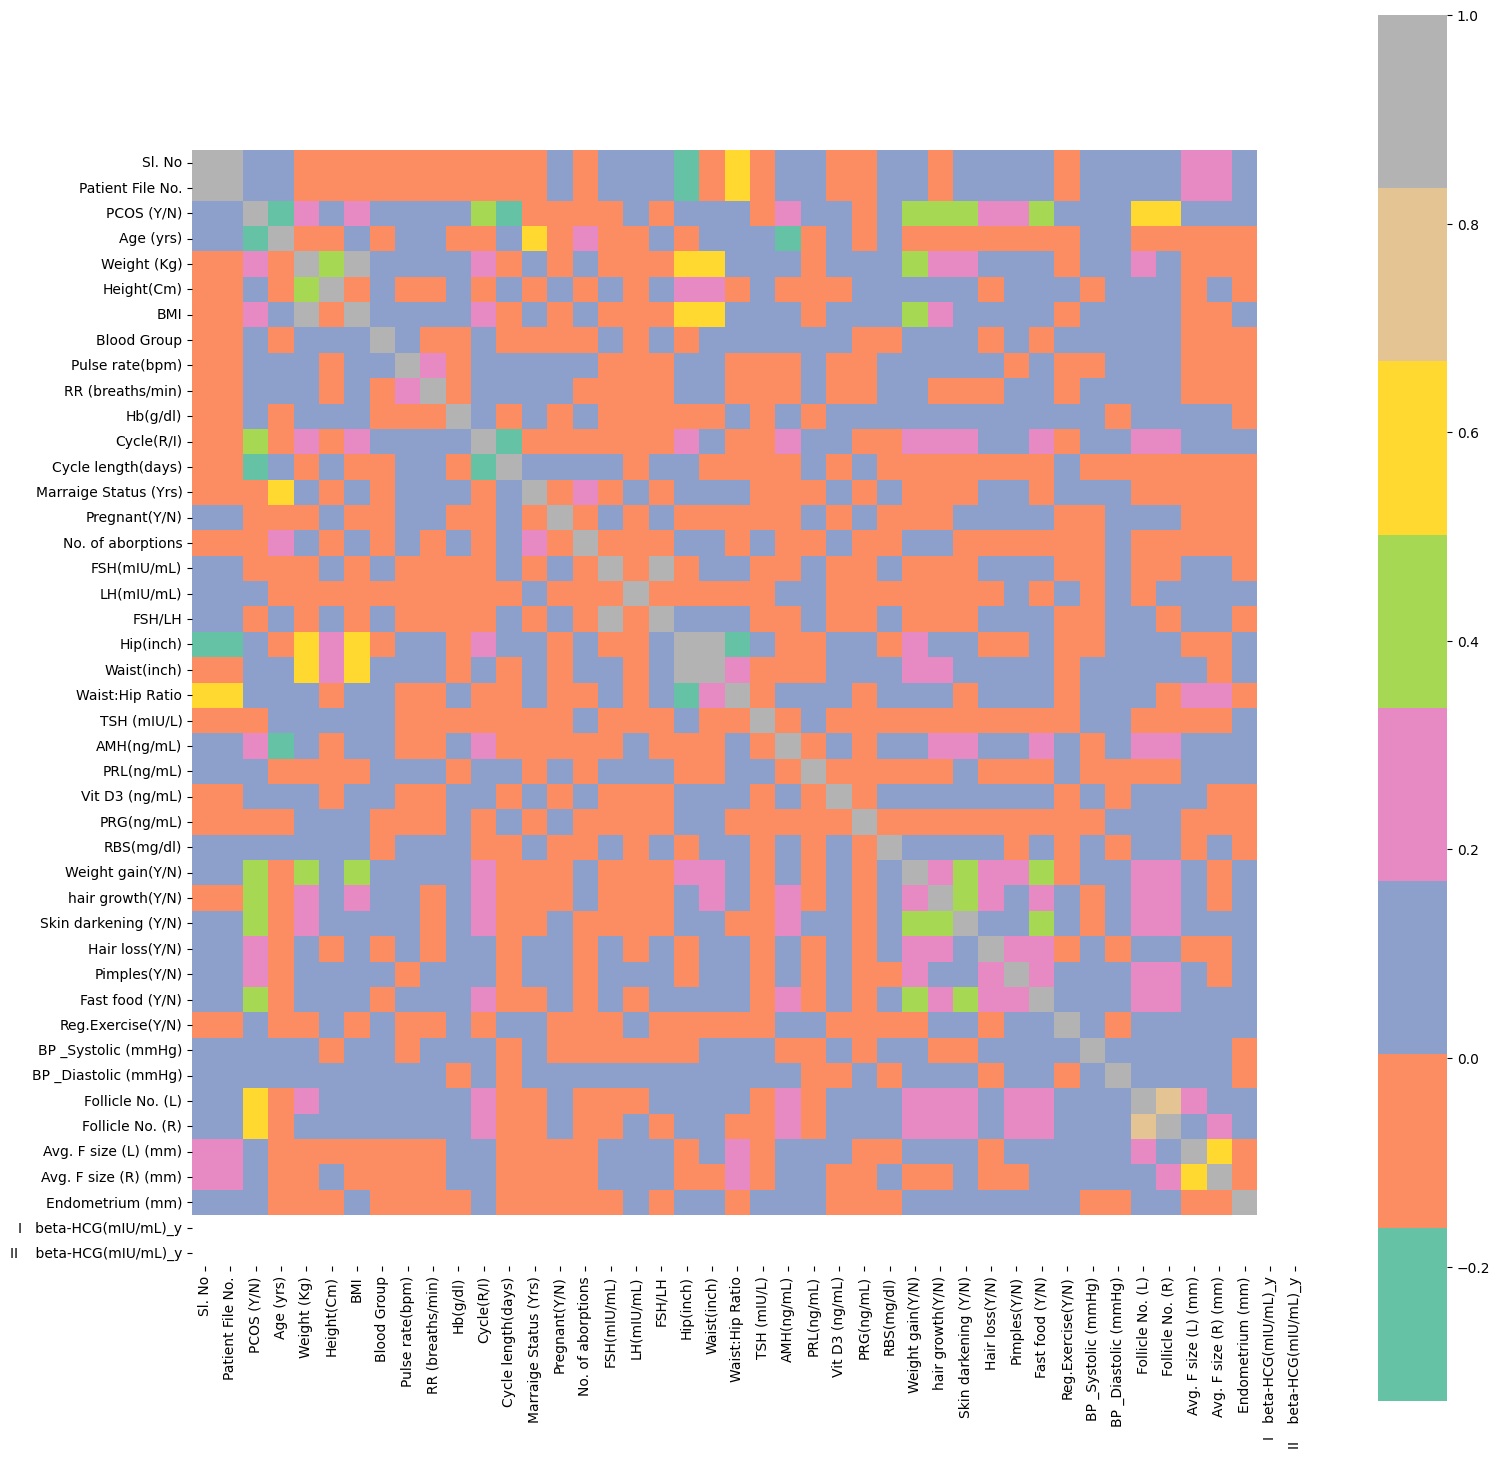

In [14]:
#Examining a correlation matrix of all the features
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat, cmap="Set2", square=True);

In [14]:

#How all the features correlate with the PCOS
corrmat["PCOS (Y/N)"].sort_values (ascending=False)

PCOS (Y/N)                  1.000000
Follicle No. (R)            0.648327
Follicle No. (L)            0.603346
Skin darkening (Y/N)        0.475733
hair growth(Y/N)            0.464667
Weight gain(Y/N)            0.441047
Cycle(R/I)                  0.401644
Fast food (Y/N)             0.376183
Pimples(Y/N)                0.286077
AMH(ng/mL)                  0.264141
Weight (Kg)                 0.211938
BMI                         0.199697
Hair loss(Y/N)              0.172879
Waist(inch)                 0.164598
Hip(inch)                   0.162297
Avg. F size (L) (mm)        0.132992
Endometrium (mm)            0.106648
Avg. F size (R) (mm)        0.097690
Pulse rate(bpm)             0.091821
Hb(g/dl)                    0.087170
Vit D3 (ng/mL)              0.085494
Height(Cm)                  0.068254
Reg.Exercise(Y/N)           0.065337
LH(mIU/mL)                  0.063879
Sl. No                      0.060998
Patient File No.            0.060998
RBS(mg/dl)                  0.048922
B

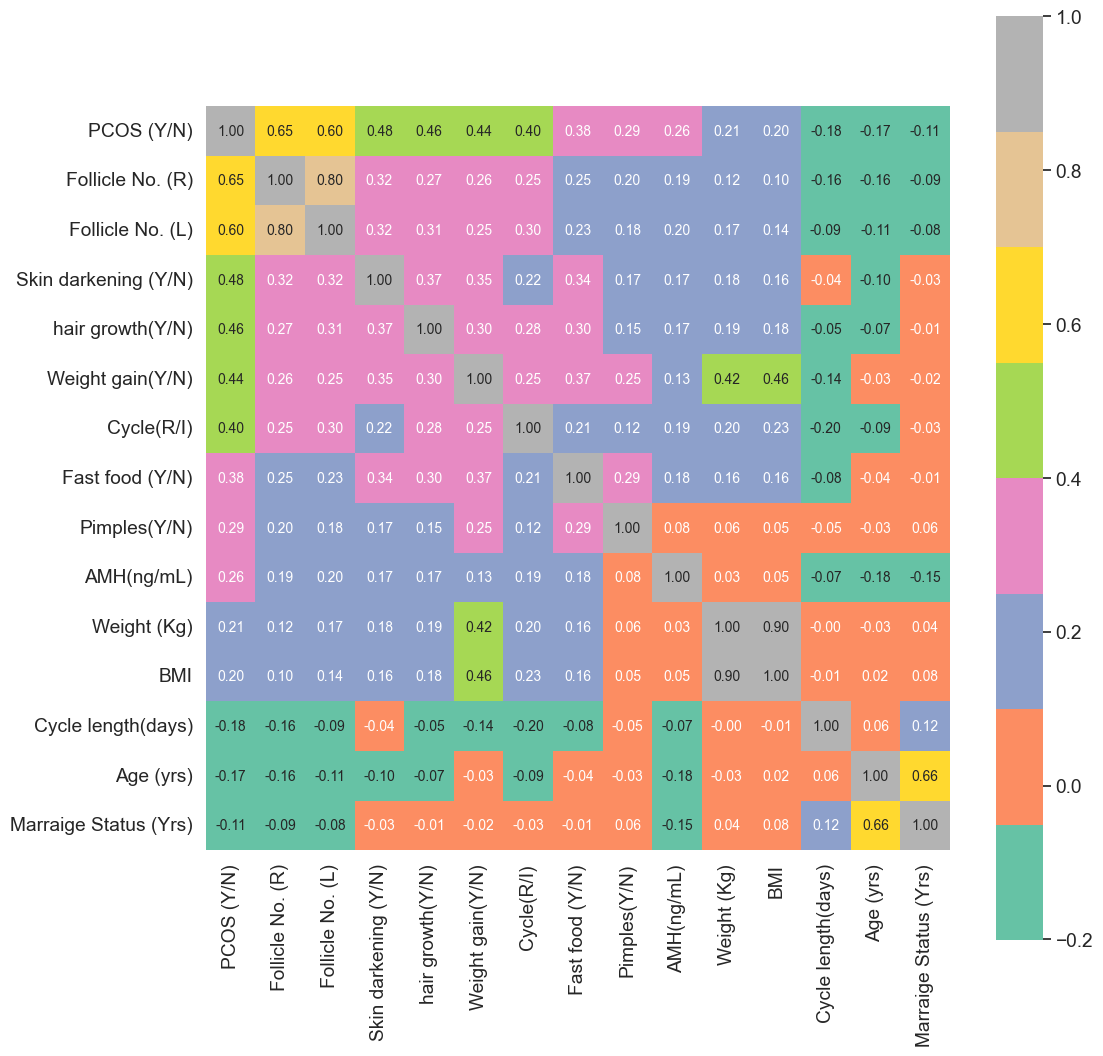

In [15]:
#Having a Look at features bearing significant correlation
plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest (k, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols_n = corrmat.nsmallest (l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n)

cm = np.corrcoef (data [cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, cmap="Set2", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,  xticklabels=cols.values)
plt.show()

Patterns of Length of Menstrual Cycle

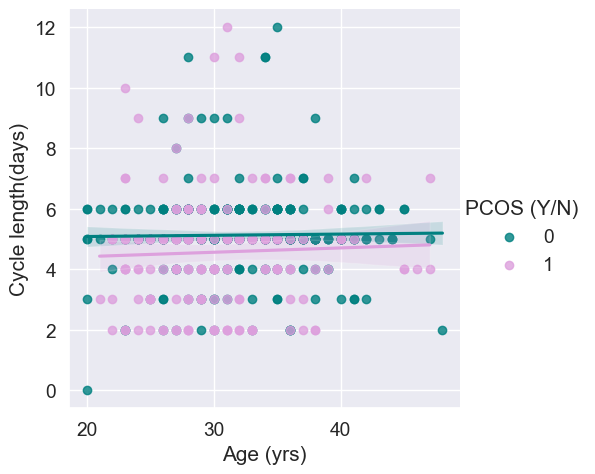

In [16]:
#Length of menstrual phase in PCOS vs normal
color =  ["teal", "plum"]
fig = sns.lmplot(data=data,x="Age (yrs)",y="Cycle length(days)", hue ="PCOS (Y/N)", palette=color)
plt.show(fig)

Patterns of BMI

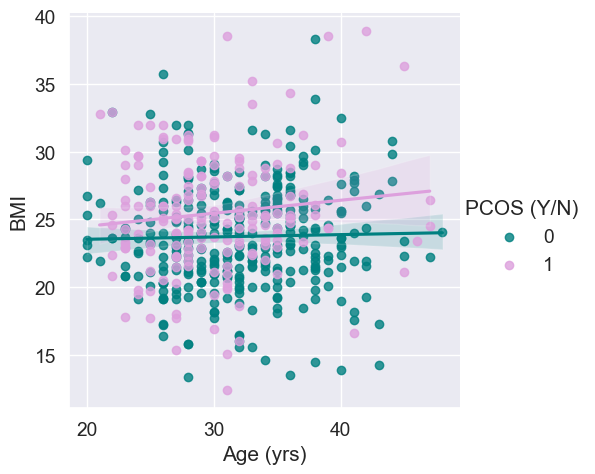

In [17]:
#Pattern of weight gain (BMI) over years in PCOS and Normal.
fig = sns.lmplot(data=data,x="Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= color)
plt.show(fig)

Patterns of irregularity in Menstruation 

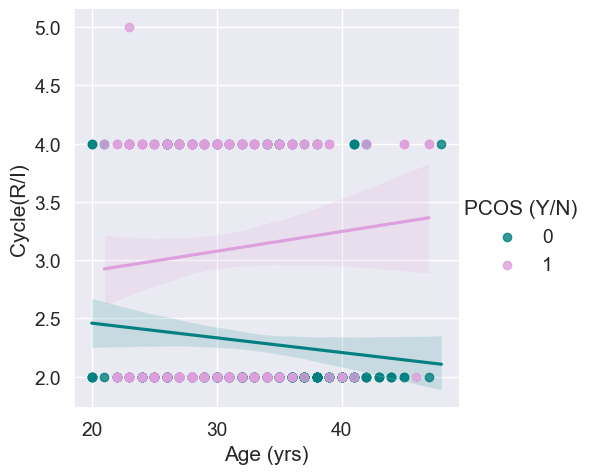

In [18]:
#cycle IR wrt age
sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)", palette=color)
plt.show()

Number of Follicles

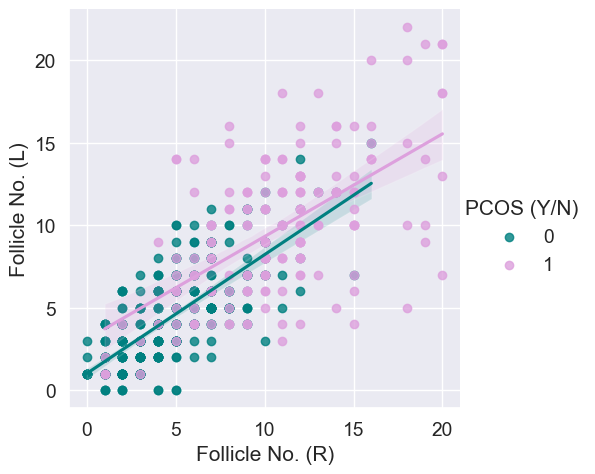

In [19]:
# Distribution of follicles in both ovaries.
sns.lmplot(data=data,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)", palette =color)
plt.show()

Model Building

In [25]:
#Assiging the features (X) and target(y)
X=data.drop(["PCOS (Y/N)", "Sl. No", "Patient File No."],axis=1) #droping out index from features too
y=data["PCOS (Y/N)"]
#Splitting the data into test and training sets
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

Comparing the accuracy of different classifiers

C:\Users\Keerthi\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['I   beta-HCG(mIU/mL)_y' 'II    beta-HCG(mIU/mL)_y']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\Keerthi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Keerthi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

LR: 0.859461 (0.033518)
KNN: 0.761380 (0.075981)
DT: 0.813367 (0.034204)
NB: 0.848451 (0.045119)
RF: 0.907609 (0.024702)
SVM: 0.676229 (0.076198)


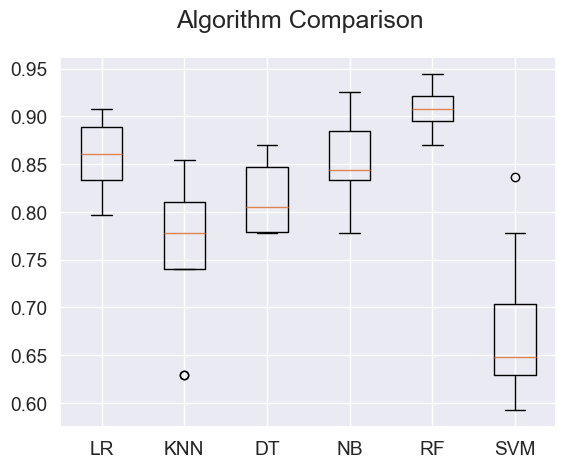

In [26]:
# Model Selection using Cross Validation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.impute import SimpleImputer
# Load dataset
X= data.drop(["PCOS (Y/N)", "Sl. No", "Patient File No."],axis=1) #droping out index from features too
Y=data["PCOS (Y/N)"]
#prepare configuration for cross validation test harness
imputer = SimpleImputer(strategy='mean')  # Or 'median' depending on your data
X = imputer.fit_transform(X)
models= []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring= 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    names.append(name)
    results.append(cv_results)
    msg=("%s: %f (%f)"%(name, cv_results.mean(), cv_results.std()))
    print(msg)


#boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [30]:
from sklearn.impute import SimpleImputer


# Load dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X= data.drop(["PCOS (Y/N)", "Sl. No", "Patient File No."],axis=1) #droping out index from features too
Y=data["PCOS (Y/N)"]
#prepare configuration for cross validation test harness
imputer = SimpleImputer(strategy='mean')  # Or 'median' depending on your data
X = imputer.fit_transform(X)
#Comparing the accuaracies of different classifiers to fing the model best sulted for our PCOS predictor

model_list= ['Decision Tree', 'RandomForest', 'LogisticRegression', 'KNearestleighbours', 'GaussianNB','SVM']

random_state = 42

classifier = [DecisionTreeClassifier(random_state= random_state), RandomForestClassifier(random_state= random_state), LogisticRegression(random_state =random_state), KNeighborsClassifier(3), GaussianNB(),SVC()]

scores=[]

for name, clf in zip(model_list, classifier):
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)
    scores.append(score)

C:\Users\Keerthi\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['I   beta-HCG(mIU/mL)_y' 'II    beta-HCG(mIU/mL)_y']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\Keerthi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
scores

[0.8440366972477065,
 0.8807339449541285,
 0.8348623853211009,
 0.6880733944954128,
 0.7889908256880734,
 0.7155963302752294]

In [32]:
df = pd.DataFrame()
df['models'] = model_list
df['score'] = scores
df

,models,score
0,Decision Tree,0.844037
1,RandomForest,0.880734
2,LogisticRegression,0.834862
3,KNearestleighbours,0.688073
4,GaussianNB,0.788991
5,SVM,0.715596


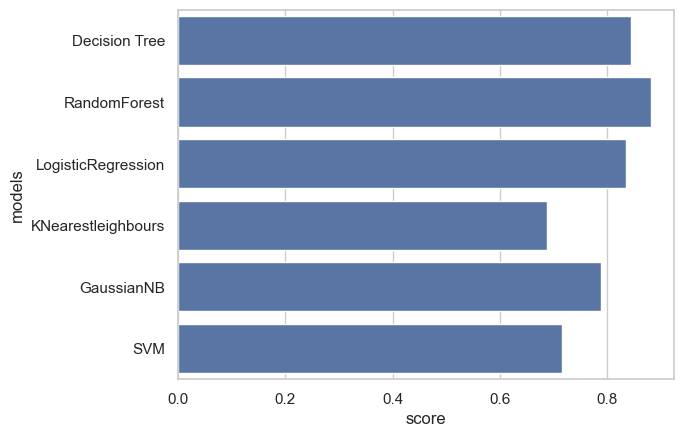

In [34]:
sns.set(style = "whitegrid")
ax = sns.barplot(y="models", x = "score", data = df)

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8348623853211009


C:\Users\Keerthi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
print(f"Score in Test Data : {logreg.score(X_test,y_test)}")
cm = confusion_matrix(y_test, y_pred)
p_right = cm[0][0] + cm[1][1]
p_wrong = cm[0][1] + cm[1][0]

print(f"Right classification : {p_right}")
print(f"Wrong classification : {p_wrong}")
cm

Score in Test Data : 0.8348623853211009
Right classification : 91
Wrong classification : 18


array([[70,  7],
       [11, 21]], dtype=int64)

In [39]:
#Fitting the RandomForestClassifier to the training set
rfc = RandomForestClassifier()
r = rfc.fit(X_train, y_train)

#making predection and checking the test set

pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

print(pred_rfc)
joblib.dump(rfc, 'rfc.joblib')

0.8715596330275229
[0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0]


['rfc.joblib']

In [40]:
import pickle

In [41]:
pickle.dump(r,open("pcos.pkl", "wb"))
load = pickle.load(open("pcos.pkl", "rb"))
res = load.score(X_test, y_test)
res

0.8715596330275229